# Situación epidemiológica La Plata
Información obtenia del instagram oficial de [Municipalidad de La Plata.](https://www.instagram.com/laplata.ciudad/)

El Repositorio de código se encuentra [aquí](https://github.com/JonathanLoscalzo/covid19_laplata)

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.ticker import MaxNLocator
import seaborn as sns

In [119]:
from IPython.display import HTML

HTML('''<script>
$(document).ready(function() {
  
  all_cells = $('div.cell.border-box-sizing.code_cell.rendered')
  
  $.each(all_cells, function(idx, val){
      if ($(val).find('div.output_wrapper').length === 0){
        $(val).hide();
      }
    });
  });
  
</script>
''')
     
# exporting
# https://reproducible-science-curriculum.github.io/publication-RR-Jupyter/02-exporting_the_notebook/index.html
# jupyter nbconvert testing.ipynb --to html --no-input
# jupyter nbconvert my_notebook.ipynb --to html --no-input --output output.html

In [120]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (20, 10)

In [121]:
datafile='../data/raw/data.csv'

In [122]:
data = pd.read_csv(datafile, encoding='utf-8', parse_dates=["Fecha"], dayfirst=True)

In [123]:
data = data[~data.isna().any(axis=1)]

In [124]:
### Casos Confirmados

# https://stackoverflow.com/questions/48860428/passing-datetime-like-object-to-seaborn-lmplot

# df = pd.DataFrame({
#     'Fecha': data.Fecha,   # pandas dates
#     'FechaNum': dates.datestr2num(data.Fecha.astype('str')), # maptlotlib dates
#     'Confirmados': data.Confirmados
# })

# @plt.FuncFormatter
# def fake_dates(x, pos):
#     """ Custom formater to turn floats into e.g., 2016-05-08"""
#     return dates.num2date(x).strftime('%Y-%m-%d')

# fig, ax = plt.subplots()

# # just use regplot if you don't need a FacetGrid
# sns.regplot('FechaNum', 'Confirmados', data=df, ax=ax, fit_reg=True, logx=True)

# # here's the magic:
# ax.xaxis.set_major_formatter(fake_dates)

# # legible labels
# ax.tick_params(labelrotation=45)

In [125]:
# _ = sns.lineplot(x="Fecha", y="Confirmados", data=data)

In [126]:
# _ = sns.lineplot(x="Fecha", y="Activos", data=data)

### Comparando: Confirmados vs Sospechosos

En abril, parecen haberse tomado muchos protocolos de sospechosos. (Linea verde punteada)

Aunque el pico de contagio parece arrancar a fin de mayo, exactamente 23 de mayo de 2020. (Linea roja punteada).

Entiendo que si van creciendo juntos, es porque se detectó un foco infeccioso.

Text(0.5, 1.0, 'Confirmados vs Sospechosos')

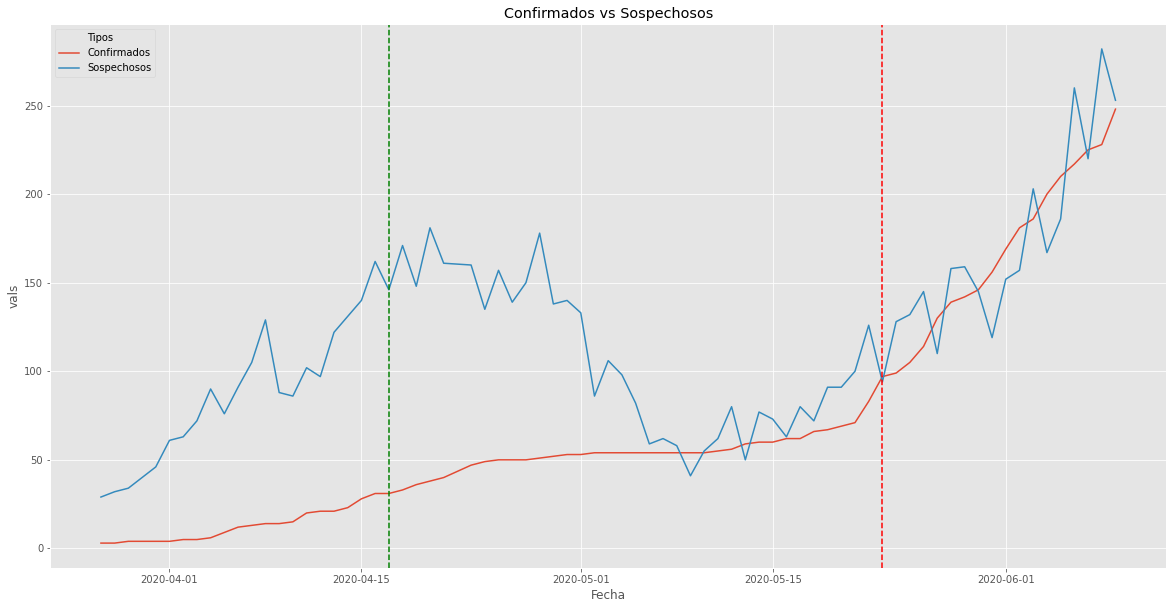

In [127]:
datamelt = data.melt('Fecha', var_name='Tipos',  value_name='vals')
datamelt = datamelt[(datamelt.Tipos !="Descartados") 
                    & (datamelt.Tipos !="Nuevos") 
                    & (datamelt.Tipos !="Muertos") 
                    & (datamelt.Tipos !="Alta Medica") 
                    & (datamelt.Tipos !="Activos") 
#                     & (datamelt.Tipos !="Confirmados")
                   ]

#https://stackoverflow.com/questions/52334938/seaborn-how-to-add-vertical-lines-to-a-distribution-plot-sns-distplot
ax = sns.lineplot(x="Fecha", y="vals", hue='Tipos', data=datamelt)
x = ax.lines[0].get_xdata()
y = ax.lines[0].get_ydata()
_ = plt.axvline(x[20], color='green', linestyle="--")
_ = plt.axvline(x[55], color='red', linestyle="--")
# ax.bar(x, data.Confirmados, alpha=0.2, label="Confirmados")
_ = ax.set_title('Confirmados vs Sospechosos')

In [128]:
# fig, ax = plt.subplots()
# data.set_index('Fecha')[["Activos", "Alta Medica", "Muertos"]].plot.bar(stacked=True, ax=ax)
# data.set_index('Fecha')[["Confirmados"]].plot.line(ax=ax)
# plt.show()

### Comparando: Activos, Muertos y con Alta Médica.

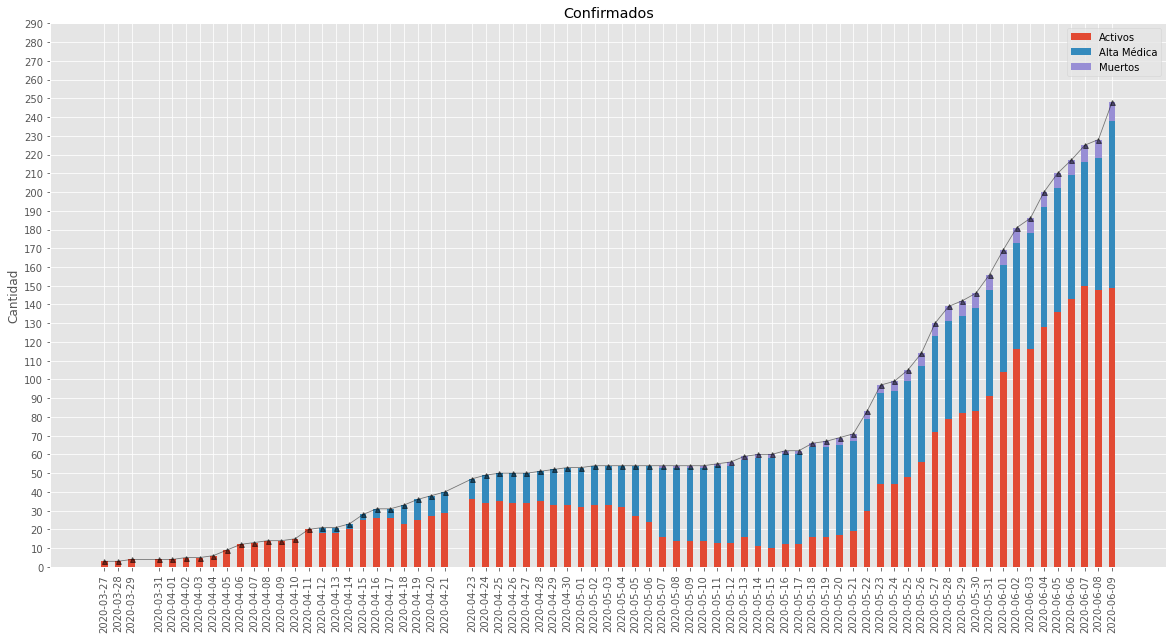

In [129]:
fig, ax = plt.subplots()


labels = data.Fecha
activos = data.Activos
alta_medica = data['Alta Medica']
muertos = data['Muertos']
width = 0.50     # the width of the bars: can also be len(x) sequence

ax.bar(data.Fecha, activos, width, label='Activos' )
ax.bar(data.Fecha, alta_medica, width, bottom=activos, label='Alta Médica')
ax.bar(data.Fecha, muertos, width, bottom=activos+alta_medica, label='Muertos')

ax.set_ylabel('Cantidad')
ax.set_title('Confirmados')

ax.plot(data.Fecha, data.Confirmados, marker='^', 
        alpha=0.5, 
        color='black', 
        linewidth=0.8, 
        markersize=5)

ax.legend()
# https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib

ax.set_xticklabels(data.Fecha.dt.date, rotation=90)
ax.set_xticks(data.Fecha.dt.date)
ax.yaxis.set_ticks(np.arange(0, 300, 10))
plt.show()
# print(*range(0,300,20))

### Nuevos Casos por día
Se calcula con la diferencia del día anterior de confirmados.

In [130]:
total= data["Confirmados"] #+ data["Alta Medica"] + data["Muertos"]
total.index = data.Fecha.copy()
total = (total - total.shift(1)).to_frame()
total.columns = ["Nuevos Casos"]
total = total.reset_index()
total = total.fillna(0)
total["Nuevos Casos"] = total["Nuevos Casos"].astype('int')
data = data.merge(total)

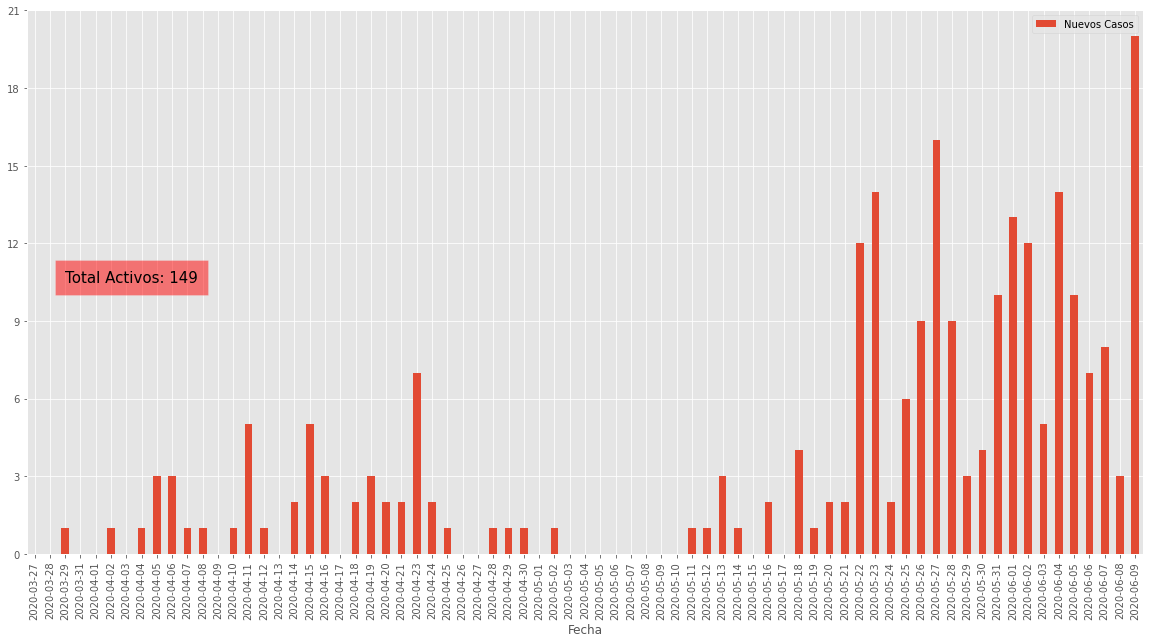

In [131]:
# sns.barplot(x="Fecha", y="Nuevos", data=data)
ax = data.plot.bar(x="Fecha", y="Nuevos Casos", rot=90, figsize=(20,10))
_ = ax.text(2, ax.get_ylim()[1] /2 ,
    f'Total Activos: {data.Activos.values[-1]}', 
    fontsize=15,
   bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10}
)

ax.set_xticklabels(data.Fecha.dt.date, rotation=90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

### Muertes por dia

In [132]:
total= data["Muertos"]
total.index = data.Fecha.copy()
total = (total - total.shift(1)).fillna(0).astype('int').to_frame()
total.columns = ["Nuevos Muertos"]
total = total.reset_index()
data = data.merge(total)

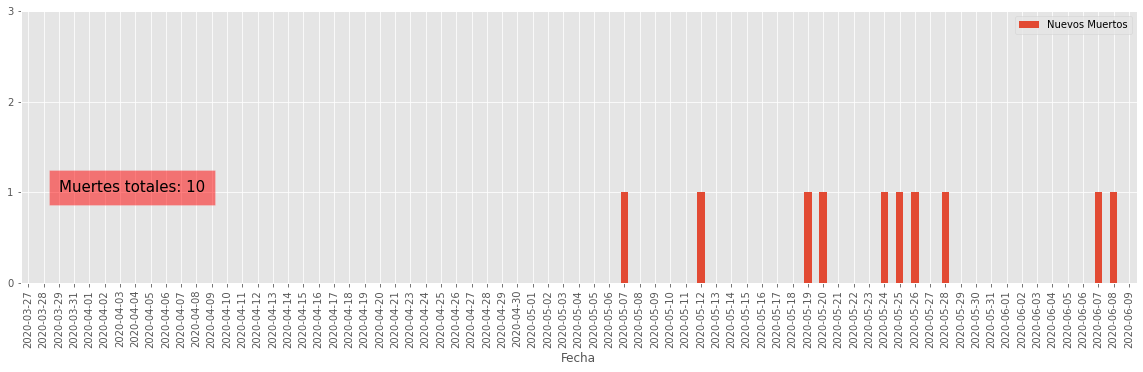

In [133]:
ax = data.plot.bar(x="Fecha", y="Nuevos Muertos", ylim=(0,3), rot=90,figsize=(20,5))
_=ax.text(2,ax.get_ylim()[1]//2,
    f'Muertes totales: {int(data.Muertos.values[-1])}', 
    fontsize=15,
    bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10}
)

ax.set_xticklabels(data.Fecha.dt.date, rotation=90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))